In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import matplotlib as mpl

# Define as configurações de fonte para usar LaTeX
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
from pcm import *
import utils

# Questão 1

Amostrar um sinal $x(t) = \sin (2\pi f t)$ e fazer modulação/demodulação PCM com $k$ bits de quantização.

Atentar para:

- Amostragem
- Quantização (uniforme)
- Codificação (binária)



## Quantização

$$Q(x_i , A, k) = A \cdot \lfloor \frac{x_i}{A} \cdot 2^k \rceil / 2^k$$ 

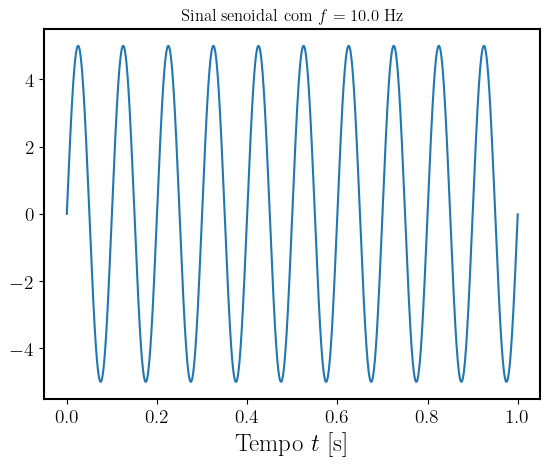

In [3]:
a = 5.0
k = 8
n = 2000
f = 10.0
ts = 1.0e-3 / (2.0*f)
t = np.arange(0.0, 1.0, step=ts)
s = a * np.sin(2*np.pi*f*t)

plt.plot(t, s)
plt.title(f"Sinal senoidal com $f={f}$ Hz")
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig(f'sinal_senoidal_{f}Hz.eps')

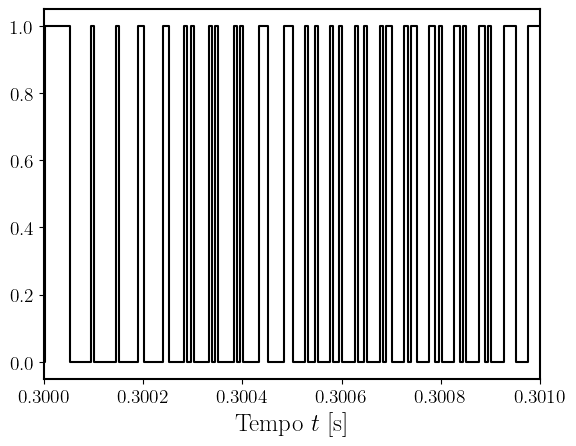

In [4]:
utils.pcm_plot(0.0, 1.0, s, a, k)
plt.xlim(0.3, 0.301)
plt.savefig('pcm_sinal_senoidal_8_bits.eps')

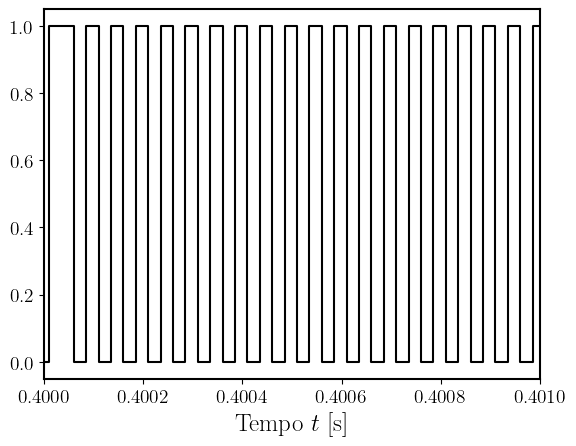

In [5]:
utils.pcm_plot(0.0, 1.0, s, a, 2)
plt.xlim(0.4, 0.401)
plt.savefig('pcm_sinal_senoidal_2_bits.eps')

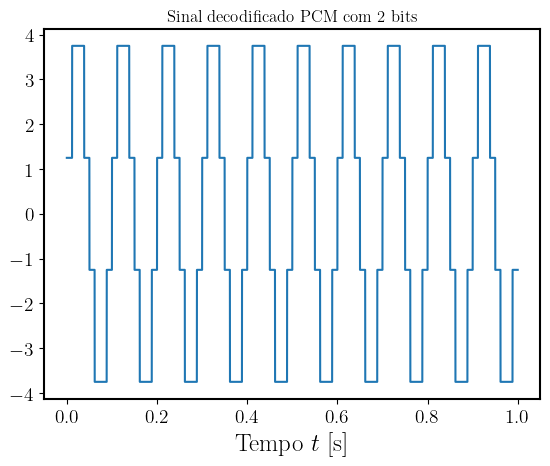

In [6]:
x_m = pcm_codification(pcm_quantization(s, a, 2), 2)
fs = 1 / ts
fc = 20.0
decoded_2bits = pcm_decodification(x_m, a, 2)
plt.plot(t, decoded_2bits)
plt.title(r'Sinal decodificado PCM com 2 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_decodificado_2_bits.eps')

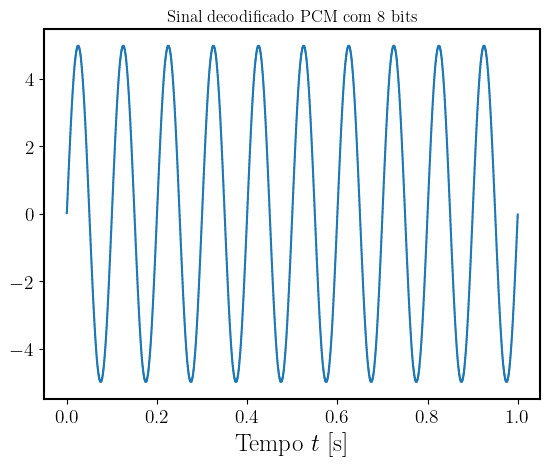

In [7]:
x_m = pcm_codification(pcm_quantization(s, a, 8), 8)
fs = 1 / ts
fc = 20.0
decoded_8bits = pcm_decodification(x_m, a, 8)
plt.plot(t, decoded_8bits)
plt.title(r'Sinal decodificado PCM com 8 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_decodificado_8_bits.eps')

## Demodulação

$$x^*(t) = \sum_{n=-\infty}^{\infty} x_d(n) \text{sinc}(t/T_s - n)$$

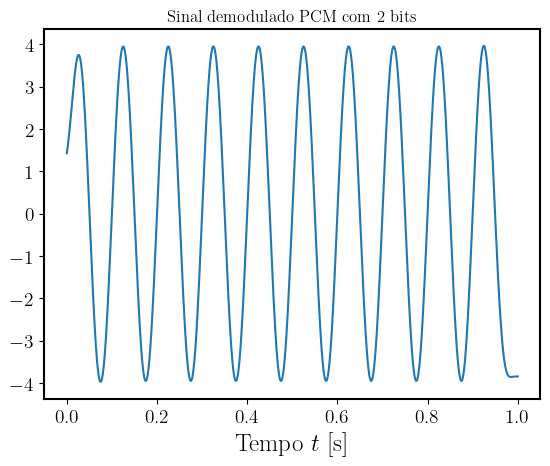

In [8]:
demodulated_2bits = pcm_demodulation(decoded_2bits, fc, fs)
plt.plot(t, demodulated_2bits)
plt.title(r'Sinal demodulado PCM com 2 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_demodulado_2_bits.eps')

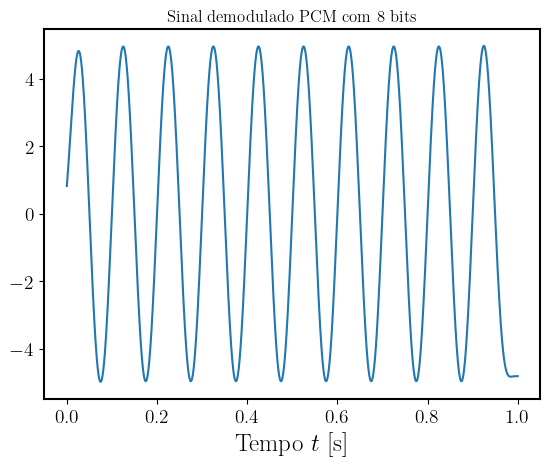

In [9]:
demodulated_8bits = pcm_demodulation(decoded_8bits, fc, fs)
plt.plot(t, demodulated_8bits)
plt.title(r'Sinal demodulado PCM com 8 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_senoidal_demodulado_8_bits.eps')

# Questão 2

Repita o procedimento anterior considerando um  ́audio (sugestão “train”) como sinal de entrada.

fs = 44100 Hz


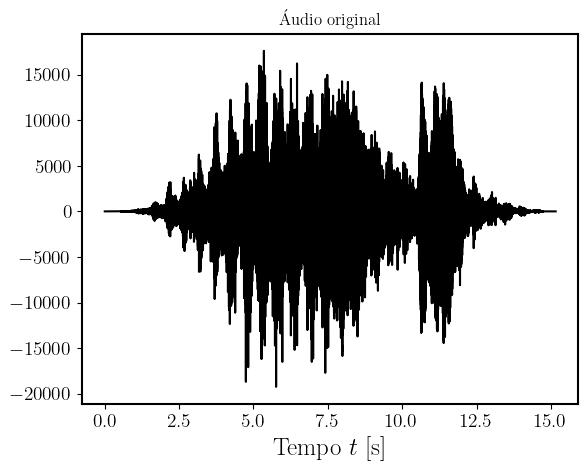

In [10]:
# Carregar áudio
fs, x = wavfile.read('steam_train.wav')
print(f"fs = {fs} Hz")
# Como o áudio é estéreo, vamos pegar apenas um canal
x = x[:, 0]
t = np.arange(0.0, len(x) / fs, step=1/fs)
plt.plot(t, x, color='black')
plt.title(r'Áudio original')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('results/steam_train_original.eps', dpi=300)


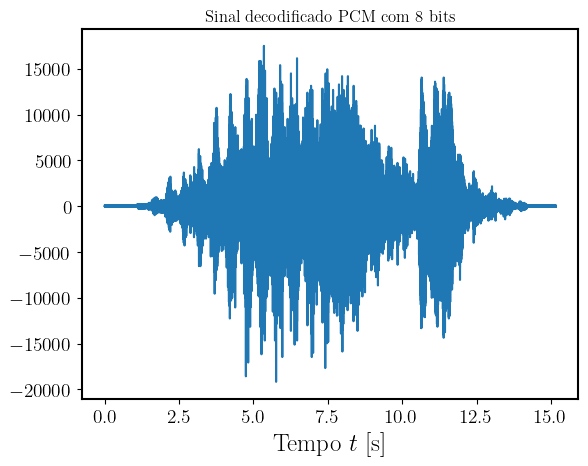

In [11]:
a = np.max(np.abs(x))
x_m = pcm_codification(pcm_quantization(x, a, 8), 8)
decoded_8bits = pcm_decodification(x_m, a, 8)
plt.plot(t, decoded_8bits)
plt.title(r'Sinal decodificado PCM com 8 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_audio_decodificado_pcm_8_bits.eps')

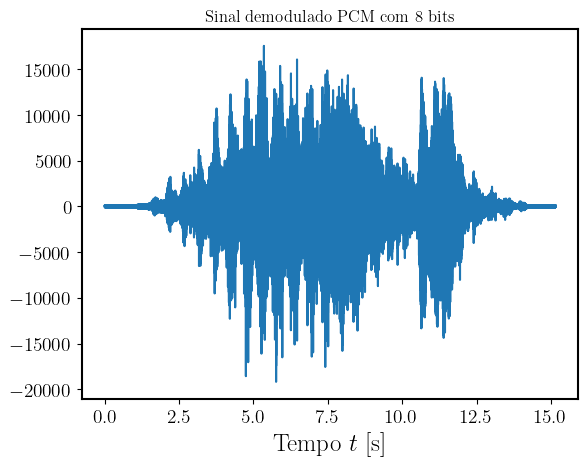

In [12]:
fc = fs / 3.0
demodulated_8bits = pcm_demodulation(decoded_8bits, fc, fs)
plt.plot(t, demodulated_8bits)
plt.title(r'Sinal demodulado PCM com 8 bits')
plt.xlabel(r'Tempo $t$ [s]')
plt.savefig('pcm_sinal_audio_demodulado_pcm_8_bits.eps')

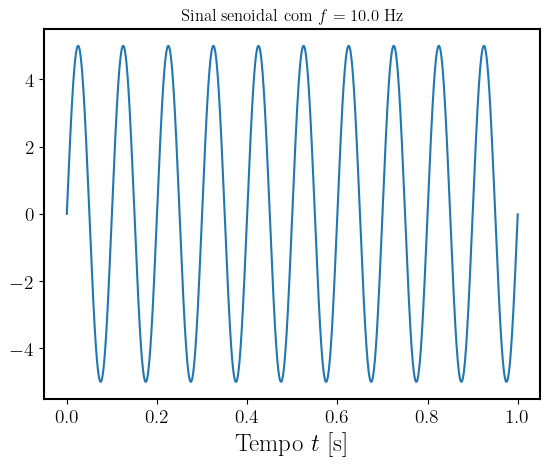

In [13]:
# DM modulation/demodulation
import dm

a = 5.0
k = 8
n = 2000
f = 10.0
ts = 1.0e-3 / (2.0*f)
fs = 1 / ts
t = np.arange(0.0, 1.0, step=ts)
s = a * np.sin(2*np.pi*f*t)

plt.plot(t, s)
plt.title(f"Sinal senoidal com $f={f}$ Hz")
plt.xlabel(r'Tempo $t$ [s]')
#plt.xlim(0.3, 0.3005)
plt.savefig(f'sinal_senoidal_{f}Hz.eps')

In [14]:
print(f"fs = {fs} Hz")

fs = 20000.0 Hz


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


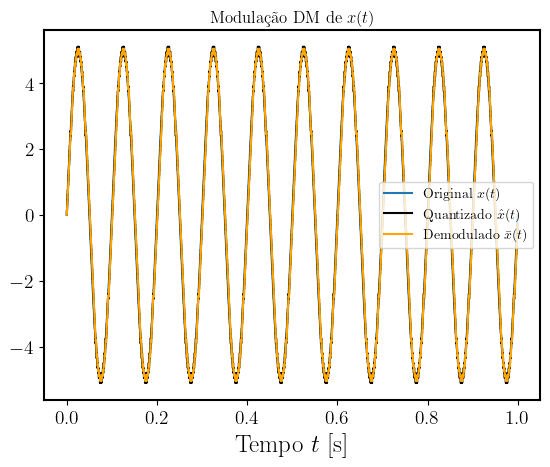

In [15]:
plt.plot(t, s, label=r'Original $x(t)$')
utils.dm_plot(0.0, 1.0, s, fs, 10, 300.0)
#plt.xlim(0.3, 0.33)
plt.savefig('dm_sinal_senoidal_n10_300dt_full.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


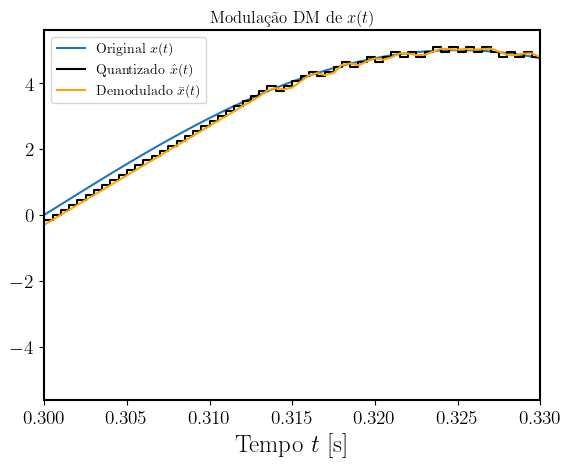

In [16]:
plt.plot(t, s, label=r'Original $x(t)$')
utils.dm_plot(0.0, 1.0, s, fs, 10, 300.0)
plt.xlim(0.3, 0.33)
plt.savefig('dm_sinal_senoidal_n10_300dt.eps')

TypeError: dm_plot() missing 1 required positional argument: 'step_size'

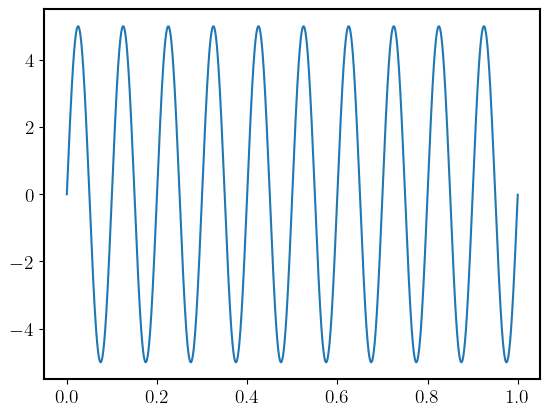

In [17]:
plt.plot(t, s, label=r'Original $x(t)$')
utils.dm_plot(0.0, 1.0, s, fs, 100.0)
#plt.xlim(0.3, 0.4)
plt.savefig('dm_sinal_senoidal_n1_100dt_full.eps')

# Parte 2.4

fs = 44100 Hz


Text(0.5, 0, 'Tempo $t$ [s]')

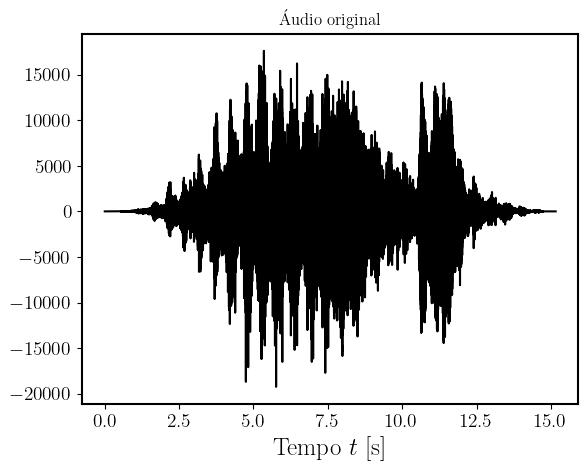

In [ ]:
# Carregar áudio
fs, x = wavfile.read('steam_train.wav')
print(f"fs = {fs} Hz")
# Como o áudio é estéreo, vamos pegar apenas um canal
x = x[:, 0]
t = np.arange(0.0, len(x) / fs, step=1/fs)
plt.plot(t, x, color='black')
plt.title(r'Áudio original')
plt.xlabel(r'Tempo $t$ [s]')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


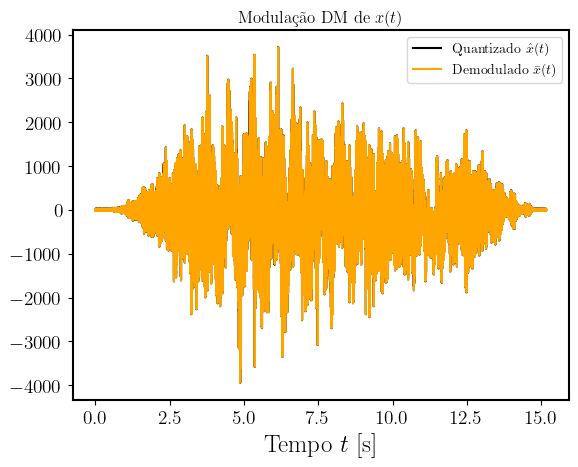

In [ ]:
a = np.max(np.abs(x))
delta = 1e6
utils.dm_plot(t[0], t[-1], x, fs, 1, delta)
plt.savefig('dm_sinal_audio_n1_1e6dt_full.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


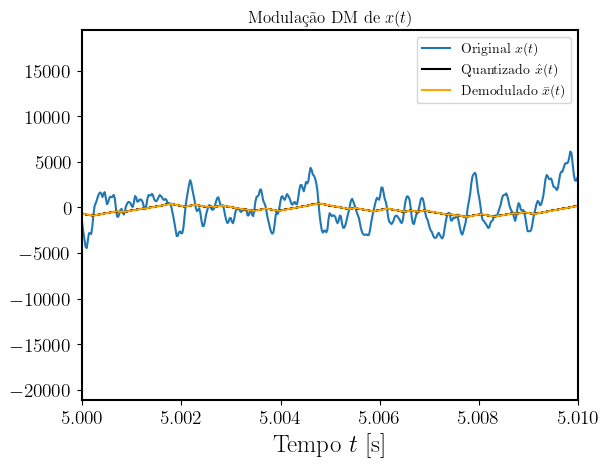

In [ ]:
plt.plot(t, x, label=r'Original $x(t)$')
utils.dm_plot(t[0], t[-1], x, fs, 1, delta)
plt.xlim(5.0, 5.01)
plt.savefig('dm_sinal_audio_n1_1e6dt.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


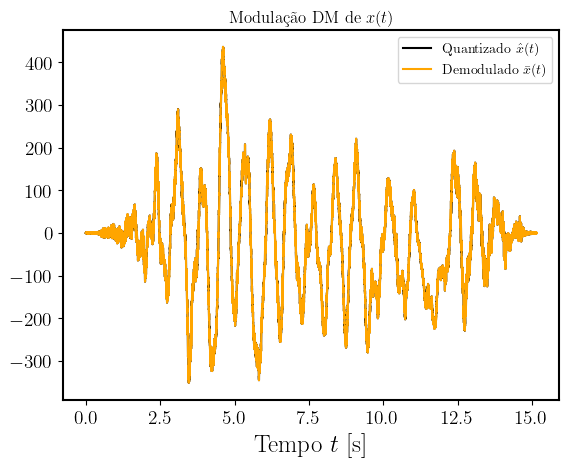

In [ ]:
delta = 1e4
utils.dm_plot(t[0], t[-1], x, fs, 1, delta)
plt.savefig('dm_sinal_audio_n1_1e4dt_full.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


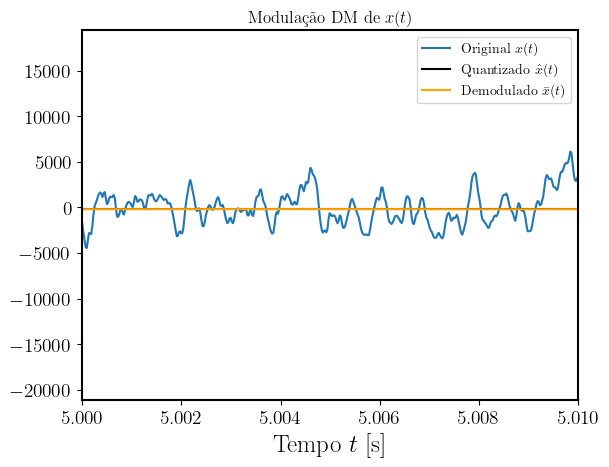

In [ ]:
plt.plot(t, x, label=r'Original $x(t)$')
utils.dm_plot(t[0], t[-1], x, fs, 1, delta)
plt.xlim(5.0, 5.01)
plt.savefig('dm_sinal_audio_n1_1e4dt.eps')